In [1]:
import random 
import time
import string

import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("part2 - Company.xlsx")
print(df)

      A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
..  ...  ...  ...  ...        ...
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

[61 rows x 5 columns]


In [3]:
df.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


In [4]:
df.info

<bound method DataFrame.info of       A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131        NaN
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
..  ...  ...  ...  ...        ...
56  200  186  185  179  Quality B
57  137  182  165  199        NaN
58   88   39    9  102        NaN
59  180  157  192  198        NaN
60  157  135  135  156        NaN

[61 rows x 5 columns]>

In [5]:
df.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [7]:
bool_series = pd.isnull(df["Quality"])
df[bool_series]

,A,B,C,D,Quality
2,159,163,135,131,NaN
5,153,140,154,199,NaN
7,191,144,143,154,NaN
9,145,178,158,141,NaN
14,186,142,146,174,NaN
18,167,171,163,191,NaN
23,171,185,181,183,NaN
27,193,169,199,155,NaN
29,29,49,6,35,NaN
32,161,138,143,139,NaN


In [9]:
#1.Drop the null values
df_01 =  pd.DataFrame(df)
df_01.dropna()


,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
6,34,28,78,22,Quality A
8,160,181,194,178,Quality B
10,76,94,107,37,Quality A
11,138,200,153,192,Quality B
12,27,106,57,37,Quality A
13,45,76,56,57,Quality A


In [11]:
df_01['Quality'] = pd.to_numeric(df_01['Quality'], errors='coerce')
df_01 = df.dropna(subset=['Quality'])
df_01['Quality'] = df_01['Quality'].astype(int)

In [12]:
df_01.dtypes

A          int64
B          int64
C          int64
D          int64
Quality    int32
dtype: object

In [13]:
attribute_to_datatype = {
    'A': 'Integer',
    'B': 'Integer',
    'C': 'Integer',
    'D': 'Integer',
    'Quality': 'String',
    
}

attribute_is_categorical = {
    'A':False,
    'B': False,
    'C': False,
    'D': False,
    'Quality': True,
    
}

In [23]:
from sklearn.datasets import make_blobs

In [24]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['Quality'+str(i) for i in range(1,5)])
df4['A'] = data4[1]

In [25]:
df1.head()

,Quality1,Quality2,Quality3,Quality4,A
0,0.220045,0.718254,1.426010,1.117620,85.117523
1,0.335378,-0.696291,-0.249102,-1.074070,-4.332580
2,2.113732,1.326301,-0.359341,-1.173262,39.690256
3,0.374667,0.529779,-0.902048,-1.666879,-39.359310
4,-0.985353,0.089253,-0.333708,-0.293874,-46.239902


# **Sythetic Data generation using clustring method**

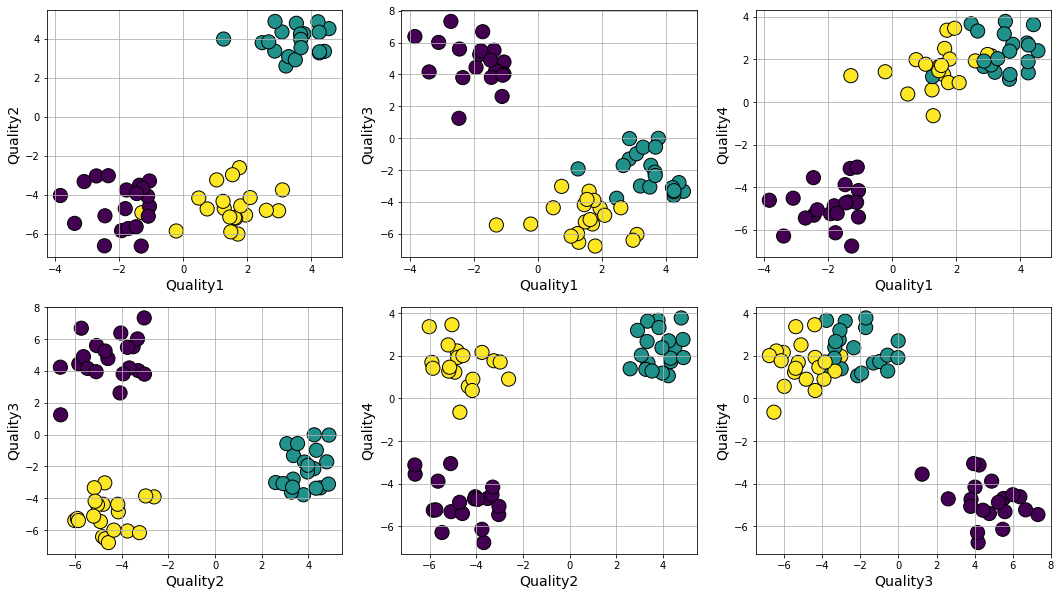

In [26]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['A'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [29]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['Quality'+str(i) for i in range(1,5)])
df4['B'] = data4[1]

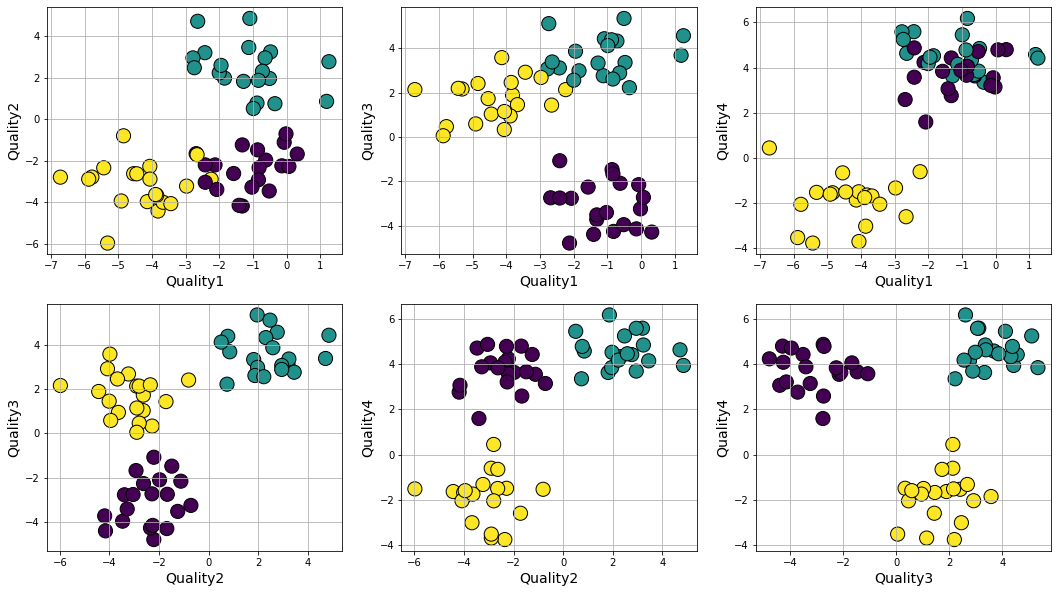

In [31]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['B'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [32]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['Quality'+str(i) for i in range(1,5)])
df4['C'] = data4[1]

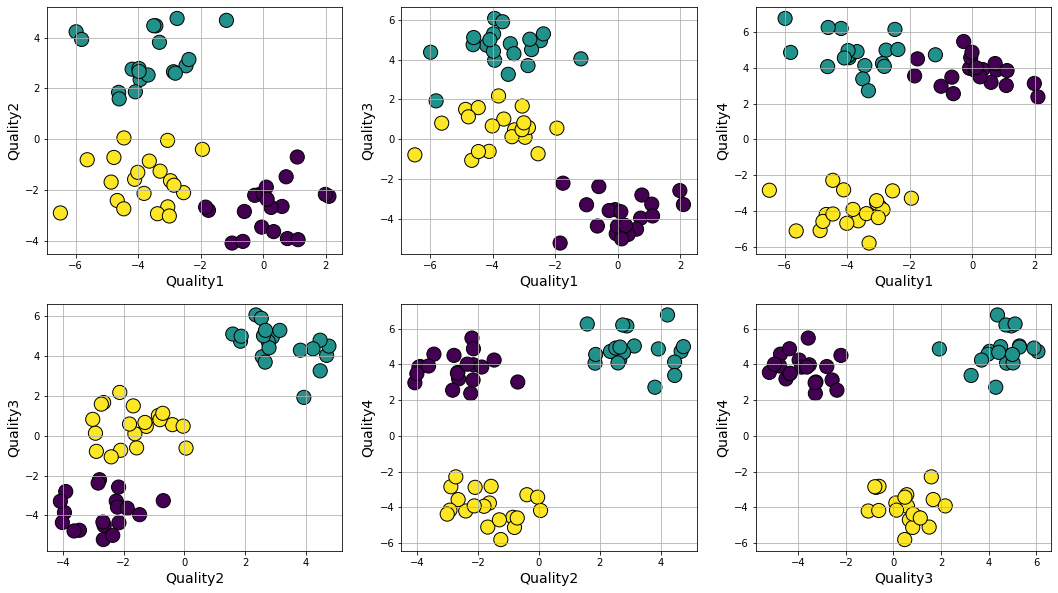

In [33]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['C'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [34]:
data4 = make_blobs(n_samples=60, n_features=4, centers=3, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df4 = pd.DataFrame(data4[0],columns=['Quality'+str(i) for i in range(1,5)])
df4['D'] = data4[1]

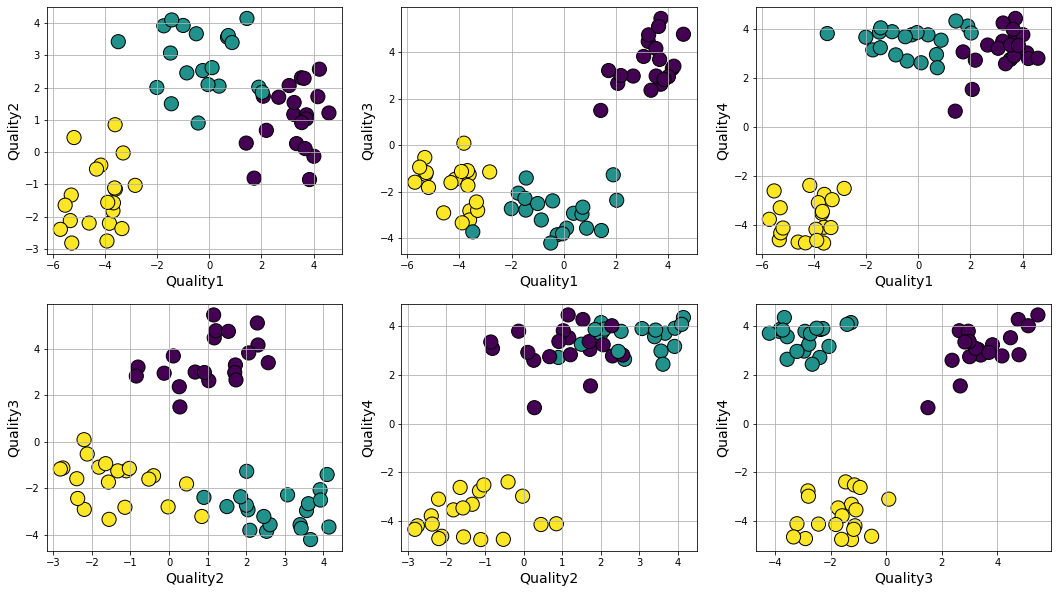

In [35]:
from itertools import combinations
from math import ceil
lst_var=list(combinations(df4.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df4[var1],df4[var2],s=200,c=df4['D'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

# Conclusion and improvements

From my obserations Category C giving us very good and clear cluters as compare to other categories.